# Exploratory Data Analysis
----



### Lighthouse Labs, Midterm Project Project - Predicting Flight Delays.

##### January 13, 2023. Terre Leung, Tetiana Fesenko, and Jamie Dormaar

---

_Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA._


_We shouldn't limit our EDA to these 10 questions. Let's be creative :)._

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import os
import json
import requests



In [4]:
# Load data tables:
flights_initial_500000_records    = pd.read_csv('../data/flights_initial_500000_records.csv', delimiter= ',')
flights_delay_dates_all_records   = pd.read_csv('../data/flights_delay_dates_all_records.csv', delimiter= ',')
flights_random_100000_records     = pd.read_csv('../data/flights_random_100000_records.csv', delimiter= ',')
#flights_random_5000_records       = pd.read_csv('../data/flights_random_5000_records.csv', delimiter= ',')
flights_test_all_records          = pd.read_csv('../data/flights_test_all_records.csv', delimiter= ',')
fuel_consumption_all_records      = pd.read_csv('../data/fuel_consumption_all_records.csv', delimiter= ',')
passengers_initial_300000_records = pd.read_csv('../data/passengers_initial_300000_records.csv', delimiter= ',')
# flights_usa = pd.read_csv('../data/usa_flights2.csv', delimiter= ',')  # Terre is there a new csv to go with this one?

In [5]:
# Save working copies of the data:
df_fl_init    = flights_initial_500000_records.copy()
df_fl_delays  = flights_delay_dates_all_records.copy()
df_fl_smpl1   = flights_random_100000_records.copy()
#df_fl_smpl2   = flights_random_5000_records.copy()
df_fl_test    = flights_test_all_records.copy()
df_fc         = fuel_consumption_all_records.copy()
df_pa_init    = passengers_initial_300000_records.copy()

##### Set your session working table to temp variable df:

In [6]:
df = df_fl_smpl1.copy()

##### SAVE a session timestamp to label the saved outputs: 
>(Optional: this can be useful if you want to help keep your files organized)


In [7]:

tag = 'smpl_100K_' # option with leading name            'Jamie_'
# tag = ''
# dt = dt.now().time().strftime(f'%b%d_%H%M')   # 'Jan01_1704'
# dt = dt.now().time().strftime(f'%b%-d_%H%M')  # 'Jan1_1708'
# dt = dt.now().time().strftime(f'%a_%H%M')        # 'Mon_1710'
dt = ''
session = f'{tag}{dt}'

##### SETUP: A first look at tables:


In [8]:

# flights_initial_500000_records
print(f'\nflights_initial_500000_records.shape: {flights_initial_500000_records.shape}')
display(flights_initial_500000_records.head())

# flights_delay_dates_all_records
print(f'\nflights_delay_dates_all_records.shape: {flights_delay_dates_all_records.shape}')
display(flights_delay_dates_all_records.head())

# flights_random_100000_records
print(f'\nflights_random_100000_records.shape: {flights_random_100000_records.shape}')
display(flights_random_100000_records.head())

# flights_test_all_records
print(f'\nflights_test_all_records.shape: {flights_test_all_records.shape}')
display(flights_test_all_records.head())

# fuel_consumption_all_records
print(f'\nfuel_consumption_all_records.shape: {fuel_consumption_all_records.shape}')
display(fuel_consumption_all_records.head())

# passengers_initial_300000_records
print(f'\npassengers_initial_300000_records.shape: {passengers_initial_300000_records.shape}')
display(passengers_initial_300000_records.head())



flights_initial_500000_records.shape: (500000, 41)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN



flights_delay_dates_all_records.shape: (15927485, 2)


,fl_date,arr_delay
0,2019-09-07,-37.0
1,2019-09-07,-20.0
2,2019-09-07,40.0
3,2019-09-07,-20.0
4,2019-09-07,-8.0



flights_random_100000_records.shape: (100000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-10-05,WN,WN,WN,179,WN,N8312C,179,12953,LGA,...,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-05,WN,WN,WN,1106,WN,N219WN,1106,12953,LGA,...,725,10.0,0.0,3.0,0.0,28.0,NaN,NaN,NaN,NaN
2,2018-10-05,WN,WN,WN,1579,WN,N8535S,1579,13232,MDW,...,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-05,WN,WN,WN,2136,WN,N436WN,2136,13342,MKE,...,1756,8.0,0.0,0.0,0.0,294.0,NaN,NaN,NaN,NaN
4,2018-10-05,WN,WN,WN,2423,WN,N221WN,2423,14057,PDX,...,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



flights_test_all_records.shape: (660556, 20)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333



fuel_consumption_all_records.shape: (3035, 25)


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016



passengers_initial_300000_records.shape: (300000, 37)


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F
3,3,3,3600,18,4,175,86,14,38,32,...,"Seal Bay, AK",US,United States,0,40,4,10,2019,1,F
4,3,3,3600,18,0,209,41,10,32,26,...,"Lazy Bay, AK",US,United States,0,40,4,10,2019,1,F


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              100000 non-null  object 
 1   mkt_unique_carrier   100000 non-null  object 
 2   branded_code_share   100000 non-null  object 
 3   mkt_carrier          100000 non-null  object 
 4   mkt_carrier_fl_num   100000 non-null  int64  
 5   op_unique_carrier    100000 non-null  object 
 6   tail_num             99685 non-null   object 
 7   op_carrier_fl_num    100000 non-null  int64  
 8   origin_airport_id    100000 non-null  int64  
 9   origin               100000 non-null  object 
 10  origin_city_name     100000 non-null  object 
 11  dest_airport_id      100000 non-null  int64  
 12  dest                 100000 non-null  object 
 13  dest_city_name       100000 non-null  object 
 14  crs_dep_time         100000 non-null  int64  
 15  dep_time          

##### NOTE: Missing Data content for each of the four data tables.


In [10]:
# Check for nulls:
# flights Table percent Null content:
df_fl_init_nulls = df_fl_init.isnull().sum().sort_values(ascending= False)
percent = (df_fl_init.isnull().sum()/df_fl_init.isnull().count()).sort_values(ascending = False)
df_fl_init_missing_data = pd.concat(
    [df_fl_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_missing_data.head(20)')
display(df_fl_init_missing_data.head(20))

# flights_test Table percent Null content:
df_fl_test_nulls = df_fl_test.isnull().sum().sort_values(ascending= False)
percent = (df_fl_test.isnull().sum()/df_fl_test.isnull().count()).sort_values(ascending = False)
df_fl_test_missing_data = pd.concat(
    [df_fl_test_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_test_missing_data.head(20)')
display(df_fl_test_missing_data.head(20))

# fuel_consumption Table percent Null content:
df_fc_nulls = df_fc.isnull().sum().sort_values(ascending= False)
percent = (df_fc.isnull().sum()/df_fc.isnull().count()).sort_values(ascending = False)
df_fc_missing_data = pd.concat(
    [df_fc_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nfuel_consumption_missing_data.head(20)')
display(df_fc_missing_data.head(20))

# passengers Table percent Null content:
df_pa_init_nulls = df_pa_init.isnull().sum().sort_values(ascending= False)
percent = (df_pa_init.isnull().sum()/df_pa_init.isnull().count()).sort_values(ascending = False)
df_pa_init_missing_data = pd.concat(
    [df_pa_init_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\npassengers_missing_data.head(20)')
display(df_pa_init_missing_data.head(20))



flights_missing_data.head(20)


,Total,Percent
longest_add_gtime,497206,0.994412
total_add_gtime,497206,0.994412
first_dep_time,497206,0.994412
cancellation_code,494796,0.989592
late_aircraft_delay,418264,0.836528
security_delay,418264,0.836528
nas_delay,418264,0.836528
weather_delay,418264,0.836528
carrier_delay,418264,0.836528
air_time,6683,0.013366



flights_test_missing_data.head(20)


,Total,Percent
tail_num,1499,0.002269
fl_date,0,0.000000
dest_airport_id,0,0.000000
flights,0,0.000000
crs_elapsed_time,0,0.000000
dup,0,0.000000
crs_arr_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000
dest,0,0.000000



fuel_consumption_missing_data.head(20)


,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329



passengers_missing_data.head(20)


,Total,Percent
departures_scheduled,0,0.0
origin_city_market_id,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country,0,0.0


##### NOTE: Differences between flights, and flights_test table data:

In [11]:
flights_columns = df_fl_init.columns
flights_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [12]:
flights_test_columns = df_fl_test.columns
flights_test_columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [13]:
fl_test_exclusion = df_fl_init[df_fl_init.columns[~df_fl_init.columns.isin([flights_test_columns])]]
fl_test_exclusion.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN


##### ANALYZE: Arrival delay details in the flights table:


#### **Task 1**: 

1. Test the hypothesis that the delay is from Normal distribution. 
1. And, that the **mean** of the arrival delays is 0. 
1. Be careful about the outliers.

>##### TASK 1.1: Test the hypothesis that the delay is from Normal distribution. 

In [14]:
df[['arr_delay']].value_counts().sort_values(ascending=False).head(20)

arr_delay
-11.0        2989
-9.0         2959
-10.0        2913
-12.0        2897
-13.0        2892
-8.0         2879
-14.0        2756
-7.0         2726
-6.0         2700
-15.0        2653
-5.0         2452
-16.0        2428
-17.0        2364
-3.0         2364
-4.0         2286
-18.0        2202
-2.0         2102
-1.0         2044
-19.0        1886
-20.0        1820
dtype: int64

In [15]:
df['arr_delay'].describe()

count    98049.00000
mean         5.38030
std         50.45599
min        -73.00000
25%        -15.00000
50%         -6.00000
75%          7.00000
max       1516.00000
Name: arr_delay, dtype: float64

The `stats` package from the `scipy` module will test the Null hypothesis that the data is normally distributed.
If the resulting p value is > than 0.05 we can assume the data is distributed normally with high statistical probability.

In [16]:
# from scipy import stats
stat, p = stats.shapiro(df['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The statistical calculation above printed the following warning:
```
UserWarning: p-value may not be accurate for N > 5000.
```
Smaller samples taken to correct for this inaccuracy:

In [17]:
# Sample a subset:
x = df.sample(1000)
len(x)

1000

In [18]:
# Rerun Shapiro Wilk Normality Test:
stat, p = stats.shapiro(x['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


The data appears to indeed be normally distributed.

>##### TASK 1.3: Managing outliers.

##### VISUALIZE: Arrival delay distribution, and manage outliers:

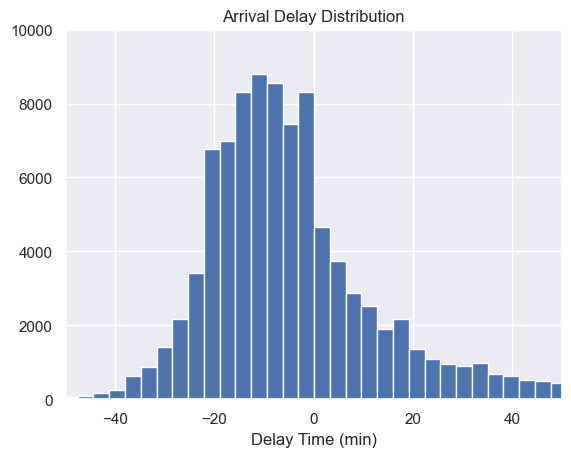

In [19]:
plt.hist(df['arr_delay'], bins=500)


plt.xlabel('Delay Time (min)')
plt.title('Arrival Delay Distribution')
plt.xlim(-50, 50)
plt.ylim(0, 10000)

plt.savefig(f'../Images/Arrival_delay_distn_{session}.png')
plt.show()


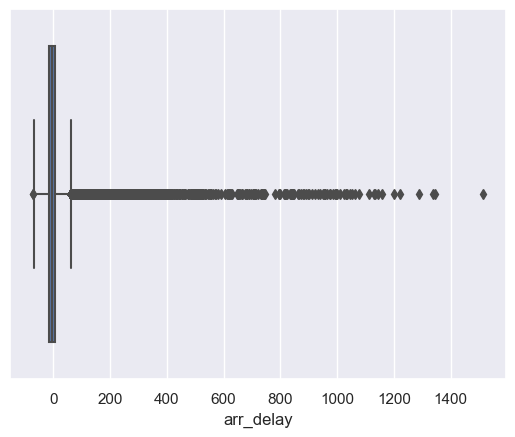

In [20]:
# Outlier detection:
sns.boxplot(data= df, x='arr_delay', whis= 2.5)

plt.savefig(f'../Images/Arrival_delay_outliers_boxplot_{session}.png')

Manually chosen outlier range limits:

In [21]:
# # Define and remove the outliers by a chosen parameter:
# max_delay = 100
# outliers    = df_fl_init[df_fl_init['arr_delay'] > max_delay]
# df_fl_clean = df_fl_init[df_fl_init['arr_delay'] < max_delay]

or using the standard 1.5 * IQR:

In [22]:
# Instantiate the Arrival Delays:
delays = df['arr_delay']

# Define the quantiles of the delay distribution:
Q1 = delays.quantile(0.25)
Q3 = delays.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
min_threshold = (Q1 - 1.5 * IQR)
max_threshold = (Q3 + 1.5 * IQR)

In [23]:
df_clean = df[~((delays < min_threshold)|(delays > max_threshold))]
df_clean.shape

(90476, 42)

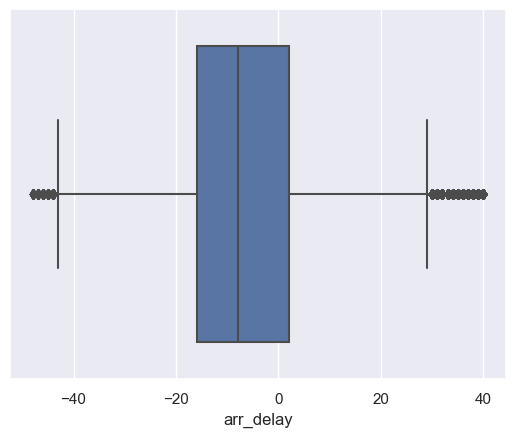

In [24]:
sns.boxplot(x=df_clean['arr_delay'])

#SAVE boxplot of clean delay distribution:
plt.savefig(f'../Images/Arrival_delay_boxplot_{session}.png')

In [25]:
# fig, ax1 = plt.subplots()

# ax1 = fl_df_clean.plot()
# ax2 = fl_df.plot()

# ax1.hist([y1, y2])
# ax1.set_xlim(-10,10)
# fig, (ax1, ax2) = plt.subplots(1, 2)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [26]:
# Convert fl_date from string to datetime data type
df_clean[['fl_date']] = df_clean[['fl_date']].apply(pd.to_datetime)

In [27]:
df_clean['date'] = df_clean['fl_date'].dt.date
df_clean['year'] = df_clean['fl_date'].dt.year
df_clean['month'] = df_clean['fl_date'].dt.month


In [28]:
print(df_clean[['year', 'month', 'fl_date', 'date']].dtypes)
display(df_clean[['year', 'month', 'fl_date', 'date']].head())

year                int64
month               int64
fl_date    datetime64[ns]
date               object
dtype: object


,year,month,fl_date,date
0,2018,10,2018-10-05,2018-10-05
2,2018,10,2018-10-05,2018-10-05
4,2018,10,2018-10-05,2018-10-05
5,2018,10,2018-10-05,2018-10-05
6,2018,10,2018-10-05,2018-10-05


In [29]:
df_clean[['month', 'year', 'arr_delay']].groupby(['year', 'month']).describe()

arr_delay                                                  
               count      mean        std   min   25%   50%  75%   max
year month                                                            
2018 1        5333.0 -6.959497  15.870498 -48.0 -18.0  -9.0  2.0  40.0
     2        4996.0 -6.154123  16.037327 -48.0 -17.0  -8.5  3.0  40.0
     4        5920.0 -5.500676  14.772053 -47.0 -15.0  -8.0  2.0  40.0
     5        5899.0 -5.177318  15.026993 -48.0 -15.0  -7.0  3.0  40.0
     7        5979.0 -4.680549  14.944762 -48.0 -15.0  -7.0  3.0  40.0
     8        5904.0 -4.147188  15.080242 -48.0 -14.0  -7.0  4.0  40.0
     9        5648.0 -6.187500  14.394973 -48.0 -16.0  -8.0  1.0  40.0
     10       5115.0 -5.208016  14.210955 -48.0 -15.0  -7.0  2.0  40.0
2019 1        5432.0 -6.514912  15.705333 -48.0 -17.0  -9.0  2.0  40.0
     3        6171.0 -6.314860  14.693912 -48.0 -16.0  -8.0  1.5  40.0
     4        5981.0 -6.480187  14.870764 -48.0 -16.0  -9.0  1.0  40.0
     5        6089.0 -5.740844  14.610060 -48.0 -15.0  -8.0  2.0  40.0
     7        6101.0 -5.372234  14.799001 -45.0 -15.0  -8.0  2.0  40.0
     9        5975.0 -7.757322  13.863267 -47.0 -17.0 -10.0 -1.0  40.0
     10       1897.0 -7.746969  13.743171 -47.0 -17.0  -9.0 -1.0  40.0
     12       6085.0 -5.615283  15.803665 -48.0 -16.0  -8.0  3.0  40.0

>NOTE: This was the point where we discovered that our initial sample of 500000 records we collected from the source flights table turned out to only include records from 2 months in 2018.  So evidently the source table is sorted by date.

In [30]:
df_clean.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'date', 'year', 'month'],
      dtype='object')

In [31]:
# Separate the data for easier viewing re annual delay trends:
df_clean_2018 = df_clean[df_clean['year']==2018]
df_clean_2019 = df_clean[df_clean['year']==2019]

In [32]:
df_clean_2018.groupby(['month']).agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2018.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

,arr_delay
month,
8,-4.147188
7,-4.680549
5,-5.177318
10,-5.208016
4,-5.500676
2,-6.154123
9,-6.187500
1,-6.959497


In [33]:
df_clean_2019.groupby('month').agg({'arr_delay': np.mean}).sort_values('arr_delay', ascending=False)
# df_delays_2019.groupby(['year', 'month']).agg(({'arr_delay': np.median}))

,arr_delay
month,
7,-5.372234
12,-5.615283
5,-5.740844
3,-6.314860
4,-6.480187
1,-6.514912
10,-7.746969
9,-7.757322


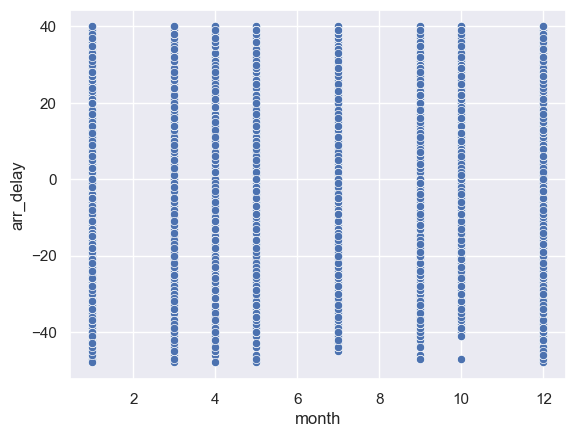

In [34]:
sns.scatterplot(data=df_clean_2019, x="month", y="arr_delay")
plt.show()

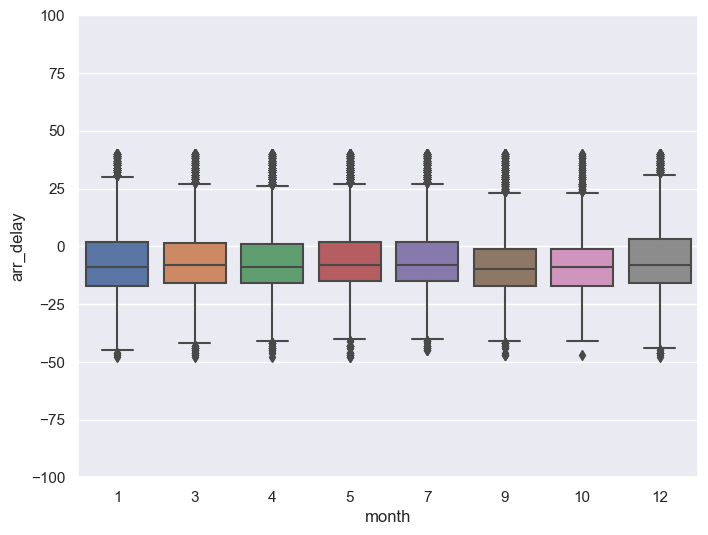

In [35]:
# month
var = 'month'
data = df_clean_2019[['arr_delay',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=-100, ymax=100)

plt.savefig(f'../Images/Arrival_delays_monthly_boxplot_{session}.png')

In [36]:
df_clean_2019.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month
count,44845.000000,44845.000000,44845.000000,44845.000000,44845.000000,43891.000000,43891.000000,43866.000000,43866.000000,43839.000000,...,4351.000000,4351.000000,4351.000000,4351.000000,95.000000,95.000000,95.000000,0.0,44845.0,44845.000000
mean,2697.843907,2697.883265,12680.343539,12679.078582,1306.998461,1302.460915,0.227837,16.701637,1327.733826,1447.660964,...,0.593197,9.545622,0.059756,7.844404,1295.126316,36.378947,35.663158,NaN,2019.0,6.078359
std,1831.740799,1831.847241,1528.640155,1528.372359,488.400375,493.231791,12.887131,8.179128,493.155616,511.026889,...,3.670759,11.158077,1.081130,11.087983,497.331950,41.994473,40.367095,NaN,0.0,3.479500
min,1.000000,1.000000,10135.000000,10135.000000,2.000000,1.000000,-33.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,528.000000,1.000000,1.000000,NaN,2019.0,1.000000
25%,1116.000000,1116.000000,11292.000000,11292.000000,900.000000,858.000000,-6.000000,11.000000,916.000000,1039.000000,...,0.000000,0.000000,0.000000,0.000000,844.000000,13.500000,13.500000,NaN,2019.0,3.000000
50%,2297.000000,2297.000000,12889.000000,12889.000000,1300.000000,1257.000000,-3.000000,15.000000,1312.000000,1439.000000,...,0.000000,4.000000,0.000000,0.000000,1330.000000,21.000000,21.000000,NaN,2019.0,5.000000
75%,4176.000000,4176.000000,14057.000000,14057.000000,1720.000000,1719.000000,1.000000,20.000000,1733.000000,1852.000000,...,0.000000,18.000000,0.000000,16.000000,1628.000000,37.500000,36.000000,NaN,2019.0,9.000000
max,9388.000000,9388.000000,16869.000000,16869.000000,2359.000000,2400.000000,865.000000,86.000000,2400.000000,2400.000000,...,40.000000,40.000000,31.000000,40.000000,2337.000000,198.000000,198.000000,NaN,2019.0,12.000000


In [37]:
pass_columns = sorted(list(df_pa_init.columns))
# pass_columns

In [38]:
# df['origin_city_name'].value_counts()

There doesn't appear to be an observable trend.

Perhaps if we isolate the flights with a single country as a destination, for example the US:

In [39]:
df_clean['origin_region_code'] = df_clean['origin_city_name'].str[-2:]
df_clean['dest_region_code'] = df_clean['dest_city_name'].str[-2:]


In [40]:
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO'
  , 'CT', 'DE', 'DC', 'FL', 'GA', 'HI'
  , 'ID', 'IL', 'IN', 'IA', 'KS', 'KY'
  , 'LA', 'ME', 'MD', 'MA', 'MI', 'MN'
  , 'MS', 'MO', 'MT', 'NE', 'NV', 'NH'
  , 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH'
  , 'OK', 'OR', 'PA', 'RI', 'SC', 'SD'
  , 'TN', 'TX', 'UT', 'VT', 'VA', 'WA'
  , 'WV', 'WI', 'WY'
]


In [41]:
df_us = df_clean[df_clean['dest_region_code'].isin(us_states)]
df_us.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,date,year,month,origin_region_code,dest_region_code
0,2018-10-05,WN,WN,WN,179,WN,N8312C,179,12953,LGA,...,NaN,NaN,NaN,NaN,NaN,2018-10-05,2018,10,NY,TN
2,2018-10-05,WN,WN,WN,1579,WN,N8535S,1579,13232,MDW,...,NaN,NaN,NaN,NaN,NaN,2018-10-05,2018,10,IL,CA
4,2018-10-05,WN,WN,WN,2423,WN,N221WN,2423,14057,PDX,...,NaN,NaN,NaN,NaN,NaN,2018-10-05,2018,10,OR,CA
5,2018-10-05,WN,WN,WN,1744,WN,N452WN,1744,14107,PHX,...,23.0,NaN,NaN,NaN,NaN,2018-10-05,2018,10,AZ,TX
6,2018-10-05,WN,WN,WN,951,WN,N8668A,951,14107,PHX,...,0.0,NaN,NaN,NaN,NaN,2018-10-05,2018,10,AZ,NV


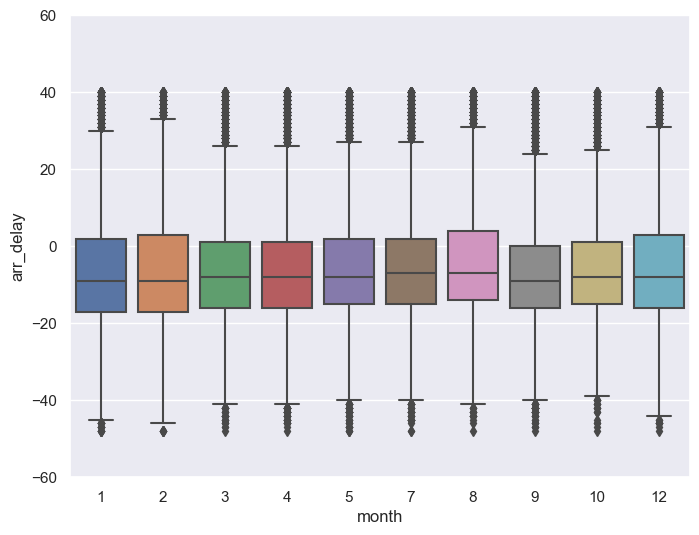

In [42]:
# month
var = 'month'
data = df_us[['arr_delay',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=-60, ymax=60)

plt.savefig(f'../Images/Arr_delays_monthly_boxplot_US_{session}.png')

In [43]:
df_us[['month', 'arr_delay']].groupby('month').median().sort_values('arr_delay')

,arr_delay
month,
1,-9.0
2,-9.0
9,-9.0
3,-8.0
4,-8.0
5,-8.0
10,-8.0
12,-8.0
7,-7.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

[Local Historical Weather API, WWO](https://www.worldweatheronline.com/weather-api/api/docs/historical-weather-api.aspx)
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [44]:
# NOTE: would like to increase location precision later with lat/long coords of the dest_airport_id later
# For now will approximate with dest_city_name and 
dest_cities = list(df_clean['dest_city_name'])
arr_date = list(df_clean['date'])
arr_time = list(df_clean['arr_time'])

The `arr_time_code` number will be used to index the correct weather type according to the flight arr_time:


In [45]:
arr_time_code = []
for i in arr_time:
    if i <= 150:
      arr_time_code.append(0)
    elif i <= 450:
      arr_time_code.append(1)
    elif i <= 750:
      arr_time_code.append(2)
    elif i <= 1050:
      arr_time_code.append(3)
    elif i <= 1350:
      arr_time_code.append(4)
    elif i <= 1650:
      arr_time_code.append(5)
    elif i <= 1950:
      arr_time_code.append(6)
    elif i <= 2250:
      arr_time_code.append(7)
    else:
      arr_time_code.append(0)

In [46]:
print(dest_cities[0])
print(arr_date[0])
print(arr_time[0])
print(arr_time_code[0])

Nashville, TN
2018-10-05
1806.0
6


In [47]:
def WWO_API_weather_type(city, date, time):
  '''
  input:
  output:  
  '''
  api_key = os.environ['WEATHER_API_KEY']
  params = {
    'q': city
    , 'date': date
    , 'format': 'json'
    , 'key': api_key
  }

  wwo_url = f'https://api.worldweatheronline.com/premium/v1/past-weather.ashx?'
  wwoHxWeather_json = requests.get(wwo_url, params=params).json()

  list_of_dict = []
  dest_site = wwoHxWeather_json['data']['weather'][0]['hourly']

  weather_dict = {
      'weather_type':   dest_site[time]['weatherDesc'][0]['value']
  }
  list_of_dict.append(weather_dict)
  return pd.DataFrame(list_of_dict)

    

### OR

In [48]:
def WWO_API_weather_aux(city, date, time):
  '''
  input: This function requires 3 input variables. 
    1. city: acceptable format includes:         # string data type
        • City Name
        • City Name, State (US only)
        • City Name, State, Country
        • City Name, Country
        • IP address: XXX.XXX.XXX.XXX
        • Postal Code (UK or Canada), Zipcode (US)
        • Latitude and longitude in decimal degrees
    2. date: 
  output:  
  '''
  api_key = os.environ['WEATHER_API_KEY']
  params = {
    'q': city
    , 'date': date
    , 'format': 'json'
    , 'key': api_key
  }

  wwo_url = f'https://api.worldweatheronline.com/premium/v1/past-weather.ashx?'
  wwoHxWeather_json = requests.get(wwo_url, params=params).json()

  list_of_dict = []
  for i in wwoHxWeather_json['data']['weather'][0]:
    weather = wwoHxWeather_json['data']['weather'][0]
    hourly = wwoHxWeather_json['data']['weather'][0]['hourly']

    weather_dict = {
          'max_temp_C':           weather['maxtempC']
        , 'min_temp_C':           weather['mintempC']
        , 'avg_temp_C':           weather['avgtempC']
        , 'total_snow_cm':        weather['totalSnow_cm']
        , 'sun_hour':             weather['sunHour']
        , 'uv_index':             weather['uvIndex']
        , 'arr_wind_chill_C':     hourly[time]['WindChillC']
        , 'arr_wind_gust_Kmph':   hourly[time]['WindGustKmph']
        , 'arr_cloud_cover':      hourly[time]['cloudcover']
        , 'arr_precip_MM':        hourly[time]['precipMM']
        , 'arr_pressure':         hourly[time]['pressure']
        , 'arr_temp_C':           hourly[time]['tempC']
        , 'arr_time':             hourly[time]['time']
        , 'arr_uv_index':         hourly[time]['uvIndex']
        , 'arr_visibility':       hourly[time]['visibility']
        , 'arr_weather_code':     hourly[time]['weatherCode']
        , 'arr_wind_dir_16Point': hourly[time]['winddir16Point']
        , 'arr_wind_dir_degree':  hourly[time]['winddirDegree']
        , 'arr_wind_speed_Kmph':  hourly[time]['windspeedKmph']
        , 'arr_weather_type':     hourly[time]['weatherDesc'][0]['value']
    }
  list_of_dict.append(weather_dict)
  return pd.DataFrame(list_of_dict)

    

### TEST

In [49]:
test_weather_desc = WWO_API_weather_type('Aberdeen, SD', '2018-01-01', 4)
test_weather_desc

KeyError: 'WEATHER_API_KEY'

In [ ]:
test_weather_aux = WWO_API_weather_aux('Aberdeen, SD', '2018-01-01', 4)
test_weather_aux

In [ ]:
# Create list of tiny dfs:
weather_type_list = []
# for i in range(df_clean.shape[0]):
for i in range(6):        # Temp until we fix/try again
  city_x = dest_cities[i]
  date_x = arr_date[i]
  time_x = arr_time_code[i]
  x = WWO_API_weather_type(city_x, date_x, time_x)
  weather_type_list.append(x)


In [ ]:
# Create list of tiny dfs:
weather_aux_list = []
# for i in range(df_clean.shape[0]):
for i in range(6):        # Temp until we fix/try again
  city_x = dest_cities[i]
  date_x = arr_date[i]
  time_x = arr_time_code[i]
  x = WWO_API_weather_aux(city_x, date_x, time_x)
  weather_aux_list.append(x)


I stopped the API function loop after 119min which only accumulated approx 21.8% of our data.

In [ ]:
# Confirm equal lengths:  
print(len(weather_type_list))
print(len(weather_aux_list))
print(len(dest_cities))

### CONCATENATE WEATHER DATA

In [ ]:
# Concatenate the list of dfs to one:

df_weather_type = pd.DataFrame()
df_x = pd.DataFrame()

for x in weather_type_list:
  df_x = pd.concat([df_weather_type, x])
  df_weather_type = df_x

df_weather_type.head()

In [ ]:
# Concatenate the list of dfs to one:

df_weather_aux = pd.DataFrame()
df_x = pd.DataFrame()

for x in weather_aux_list:
  df_x = pd.concat([df_weather_aux, x])
  df_weather_aux = df_x

df_weather_aux.head()

In [ ]:
df_clean.shape

In [ ]:
# Create a truncated version of the df_clean to at least save what we have:
temp = df_clean.copy()
temp = temp.reset_index()
temp.shape

In [ ]:
# df_clean_trunc = temp.loc[0:19702, :]
df_clean_trunc = temp.loc[0:5, :]
df_clean_trunc.shape

In [ ]:
# Add the new column to working df:
df_clean_trunc['weather'] = list(df_weather_type['weather_type'])

In [ ]:
# Confirm the weather type in df:
df_clean_trunc.weather.head()

##### SAVE new version of df_clean with weather_types:

In [ ]:
# df_clean_trunc.to_csv(f'../data/flights_clean_df{session}.csv', index= False)
# df_clean_trunc = pd.read_csv('../data/flights_clean_dfsmpl_100K_.csv')

In [ ]:
# 
var = 'weather'
data = df_clean_trunc[['arr_delay',var]]

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
fig.axis(ymin=-60, ymax=60)

plt.savefig(f'../Images/Arr_delays_weather_type_boxplot_{session}.png')

In [ ]:
# NOTE: would like to increase location precision later with lat/long coords of the dest_airport_id later
# For now will approximate with dest_city_name and state code.
dest_cities = list(df_clean['dest_city_name'])
arr_date = list(df_clean['date'])
arr_time = list(df_clean['arr_time'])

In [ ]:
test_aux = WWO_API_aux_weather('Aberdeen, SD', '2018-01-01', 4)
test_aux

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

# Handling Outliers

In [ ]:
df_clean

##### Let's look at a boxplot of our target variable (taxi_out) to identify any outliers.

In [ ]:
ax = sns.boxplot(x=df_clean["taxi_out"])
plt.show()

In [ ]:
Q1 = df["taxi_out"].quantile(0.25)
Q3 = df["taxi_out"].quantile(0.75)
IQR = Q3 - Q1

bound = Q3 + 1.5 * IQR
print(f'The upper bound time limit for taxi time is : {bound}')

In [ ]:
ax = sns.boxplot(x=df_clean["taxi_in"])
plt.show()

In [ ]:
Q1 = df["taxi_in"].quantile(0.25)
Q3 = df["taxi_in"].quantile(0.75)
IQR = Q3 - Q1

bound = Q3 + 1.5 * IQR
print(f'The upper bound time limit for taxi time is : {bound}')


# Months

In [ ]:
sns.set_style('darkgrid')
ax = sns.countplot(x="month", data=df_clean)
ax.set_title('Month Counts');

In [ ]:
month_grouped = df_clean.groupby(['month'])['taxi_out'].mean()

month_grouped = month_grouped.reset_index()

ax = sns.barplot(x='month', y='taxi_out', data=month_grouped, color='#45B39D');

ax.set_title('Taxi-Out time by Month');
ax.set_ylabel('Average Taxi-Out time (Minutes)');

In [ ]:
month_grouped = df_clean.groupby(['month'])['taxi_in'].mean()

month_grouped = month_grouped.reset_index()

ax = sns.barplot(x='month', y='taxi_in', data=month_grouped, color='#45B39D');

ax.set_title('Taxi-In time by Month');
ax.set_ylabel('Average Taxi-Out time (Minutes)');

### Let's check Departure Time vs Taxi Out and Arrival Time vs Taxi In

In [ ]:
df_clean.columns


In [ ]:
# Let's access the dep_time and arr_time columns

In [ ]:
df_clean.loc[0:5,["dep_time","arr_time"]]

In [ ]:
# The data has some NaN values, so let's clean them up and create a new df_clean_departure_time

In [ ]:
df_clean_departure_time = df_clean[df_clean.dep_time.notnull()]
df_clean_departure_time

In [ ]:
df_clean_departure_time["dep_time_hour"] = df_clean_departure_time["dep_time"].apply(lambda x: str(int(x))[:-2])

In [ ]:
# Let's create a Boxplot to see the relations between the hour of the day and the taxi_out timing

In [ ]:
sns.boxplot(data=df_clean_departure_time, x="dep_time_hour", y = "taxi_out")

In [ ]:
df_clean_departure_time["dep_time"].apply(lambda x: str(int(x))[:-2])

In [ ]:
# The data has some NaN values, so let's clean them up and create a new df_clean_arrival_time

In [ ]:
df_clean_arrival_time = df_clean[df_clean.arr_time.notnull()]
df_clean_arrival_time

In [ ]:
# Clean the data

In [ ]:
df_clean_arrival_time["arr_time"].apply(lambda x: str(int(x))[:-2])

In [ ]:
df_clean_arrival_time["arr_time_hour"] = df_clean_arrival_time["arr_time"].apply(lambda x: str(int(x))[:-2])

In [ ]:
# Let's create a Boxplot to see the relations between the hour of the day and the taxi_in timing

In [ ]:
sns.boxplot(data=df_clean_arrival_time, x="arr_time_hour", y = "taxi_in")

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
flights_usa[['fl_date']] = flights_usa[['fl_date']].apply(pd.to_datetime)
flights_usa['fl_date']

In [ ]:
flights_usa['year'] = flights_usa['fl_date'].dt.year
flights_usa['month'] = flights_usa['fl_date'].dt.month

In [ ]:
#See the distributions
flights_usa[['year', 'month']].value_counts().sort_index(ascending=False)

In [ ]:
flights_usa['state'] = flights_usa['origin_city_name'].str[-2:]
flights_usa['late_arr'] = (flights_usa['arr_delay'] > 0).astype(int)
flights_usa['late_dep'] = (flights_usa['dep_delay'] > 0).astype(int)
flights_usa

In [ ]:
flights_usa['speed'] = flights_usa['distance']/flights_usa['air_time']
no_dep_delay = flights_usa[flights_usa['late_dep'] == 0]
yes_dep_delay = flights_usa[flights_usa['late_dep'] == 1]

In [ ]:
#If there is no departure delay, there is a 15% chance of late arrival
no_dep_delay['late_arr'].mean()

In [ ]:
#If there is a departure delay, there is a 73% chance of late arrival
yes_dep_delay['late_arr'].mean()

#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
top_8 = flights_usa['state'].value_counts().head(8)
top_8

In [ ]:
total_flight = flights_usa['origin_city_name'].count()
total_flight

In [ ]:
#These 8 states cover 53% of the flight
top_8.sum()/total_flight

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
#Mean of planes speed without departure delay
no_dep_delay['speed'].mean()

In [ ]:
#Mean of planes speed with departure delay
yes_dep_delay['speed'].mean()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

##### 10.1 Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [50]:
Monthly_Avg_Delay= df_clean.groupby(['mkt_carrier','month'], axis=0, as_index=True).agg({'arr_delay':'mean'})
Monthly_Avg_Delay.head(15)

arr_delay
mkt_carrier month           
AA          1      -5.150402
            2      -5.078149
            3      -4.907731
            4      -5.970855
            5      -4.819571
            7      -4.209555
            8      -4.135374
            9      -6.453747
            10     -5.651473
            12     -5.083718
AS          1      -5.510345
            2      -8.125541
            3      -4.716012
            4      -6.587678
            5      -4.738235

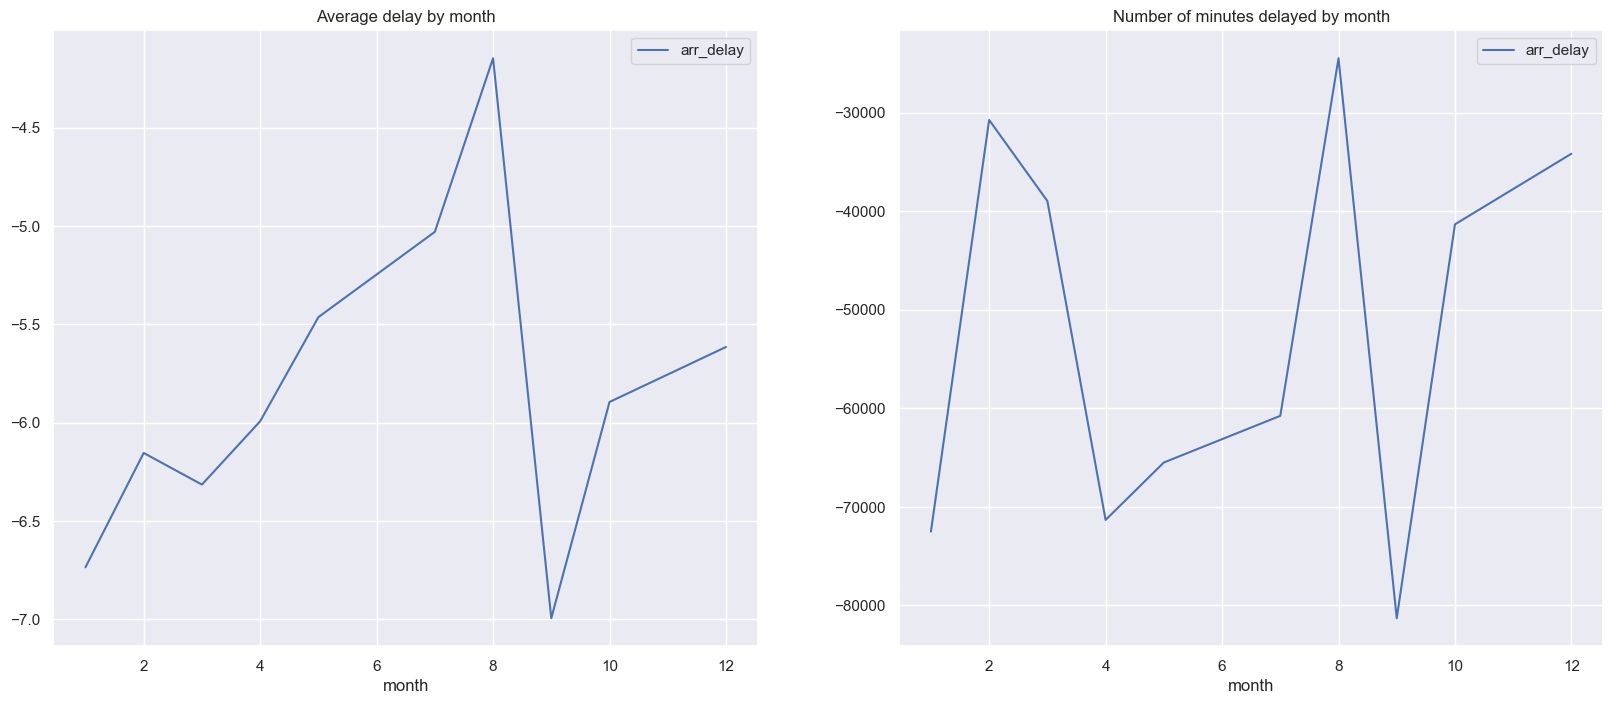

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_clean[['month','arr_delay']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
df_clean[['month','arr_delay']].groupby(['month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

##### 10.2 Find out distance covered monthly by different air carriers

In [60]:
Monthly_Distance= df_clean.groupby(['mkt_carrier','month'], axis=0, as_index=True).agg({'distance':'sum'})
Monthly_Distance.head(15)

distance
mkt_carrier month          
AA          1       2039906
            2        971114
            3       1141371
            4       2158112
            5       2250797
            7       2193764
            8       1109244
            9       2056376
            10      1285313
            12      1095365
AS          1        535132
            2        203119
            3        319074
            4        646645
            5        670824

<AxesSubplot: xlabel='distance', ylabel='mkt_carrier'>

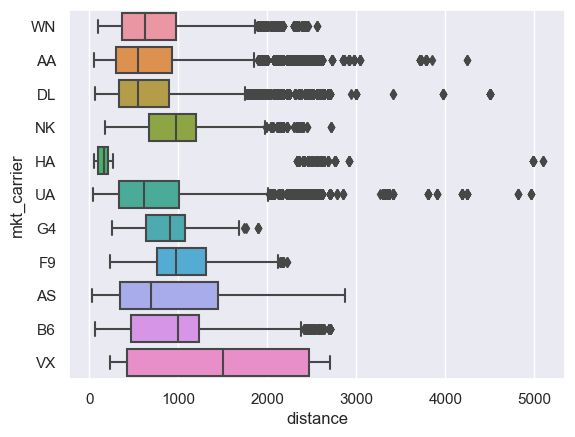

In [66]:
sns.boxplot(data=df_clean, x="distance", y = "mkt_carrier")

##### 10.3 Find out number of passengers that were carried by different air carriers

In [58]:
Monthly_Passengers= df_pa_init.groupby(['carrier_name','month'], axis=0, as_index=True).agg({'passengers':'sum'})
Monthly_Passengers.head(15)

passengers
carrier_name                month            
40-Mile Air                 1              35
                            2              29
                            3              60
                            4              71
                            11             37
                            12            110
ABS JETS A.S                8              10
                            11              2
                            12              2
ABSA-Aerolinhas Brasileiras 4               0
                            5               0
                            11              0
                            12              0
ABX Air Inc                 1               0
                            2               0

##### 10.4 Find out total fuel comsumption per air carrier.

In [57]:
Fuel_Cons= df_fc.groupby(['carrier_name'], axis=0, as_index=True).agg({'total_gallons':'sum'})
Fuel_Cons.head(15)

,total_gallons
carrier_name,
ABX Air Inc,6.367883e+06
Air Transport International,4.061171e+07
Air Wisconsin Airlines Corp,1.306834e+08
Alaska Airlines Inc.,2.678455e+09
Allegiant Air,8.497621e+08
Aloha Air Cargo,2.405682e+07
American Airlines Inc.,1.663489e+10
Amerijet International,1.109990e+08
Asia Pacific,1.841684e+07


<AxesSubplot: xlabel='carrier_name', ylabel='total_gallons'>

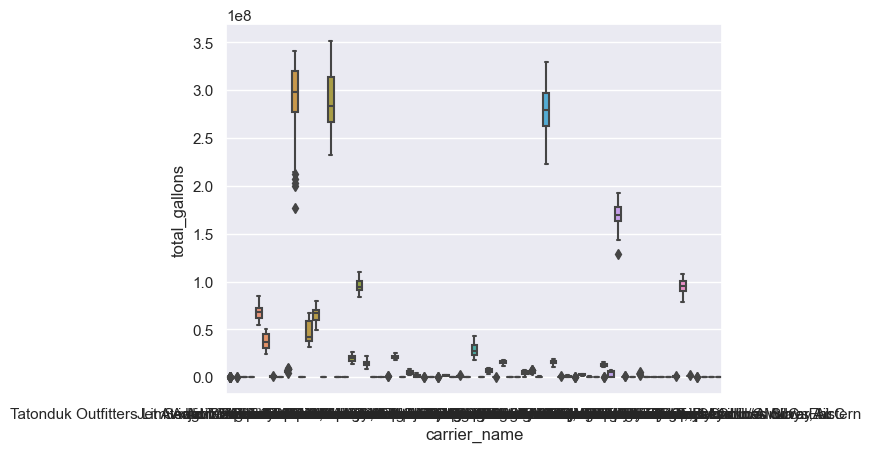

In [62]:
sns.boxplot(data=df_fc, x="carrier_name", y = "total_gallons")